In [138]:
import sys
sys.path
from Utils import rul_utils
import warnings
warnings.filterwarnings("ignore")

In [139]:
import scipy
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load and process data

Text(0.5, 0, 'Op3')

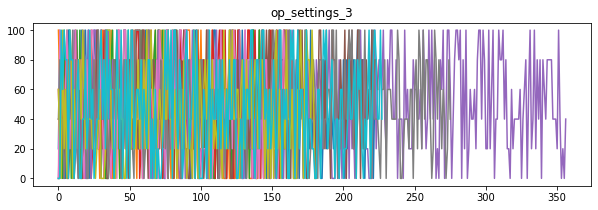

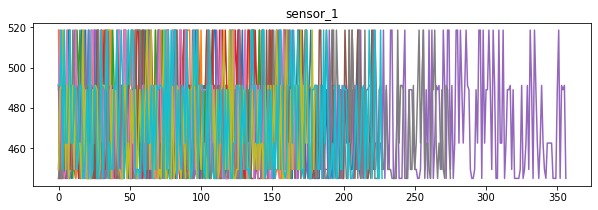

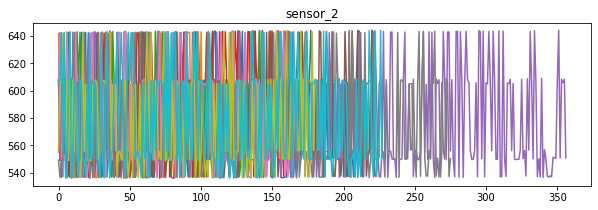

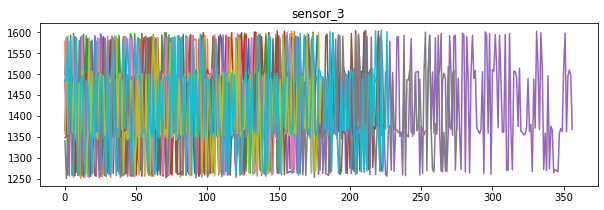

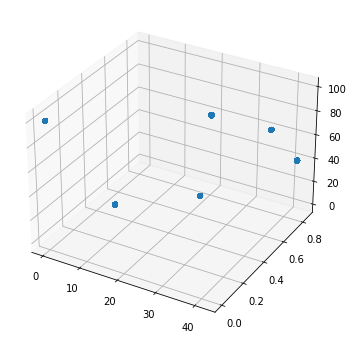

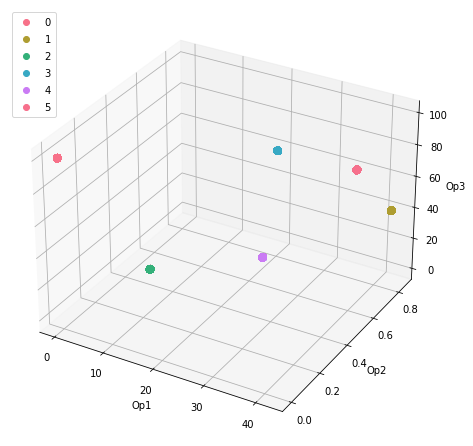

In [140]:
from turtle import update
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

data = pd.read_csv('Thuy/train.txt', delimiter = ' ', header=None)

updated_col_names = data.columns.values.tolist()
updated_col_names[0] = 'Unit'
updated_col_names[1] = 'Time'

condition_operations = ['op_settings_' + str(i-1) for i in updated_col_names[2:5]]
updated_col_names[2:5] = condition_operations

sensors = ['sensor_' + str(i-4) for i in updated_col_names[5:]]
updated_col_names[5:] = sensors

data.drop([26, 27],inplace=True, axis=1)

rename_dict = dict(zip(data.columns.values.tolist(), updated_col_names))
data = data.rename(columns = rename_dict)

data.head()

rul_utils.plot_samples(data, plot_cols=['op_settings_3', 'sensor_1', 'sensor_2', 'sensor_3'], plot_units=10)
                             
### Plot Clusters

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 2], data.iloc[:, 3], data.iloc[:, 4])

kmean= KMeans(6, n_init=5)
kmean.fit(data.iloc[:, 2:5])

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data.iloc[:, 2], data.iloc[:, 3], data.iloc[:, 4], 
                s=50, c=kmean.labels_, marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), loc=2)

ax.set_xlabel('Op1')
ax.set_ylabel('Op2')
ax.set_zlabel('Op3')

# Data Preparation

In [141]:
data.loc[:, 'label'] = kmean.labels_
data.rename(columns={'Time': 'Timestep'}, inplace=True)
data

,Unit,Timestep,op_settings_1,op_settings_2,op_settings_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,label
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,2
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,0
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,5
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,4
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,1
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,1
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,1
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,5


In [142]:
data_valid = pd.read_csv('Thuy/test.txt', delimiter = ' ', header=None)

updated_col_names = data_valid.columns.values.tolist()
updated_col_names[0] = 'Unit'
updated_col_names[1] = 'Time'

condition_operations = ['op_settings_' + str(i-1) for i in updated_col_names[2:5]]
updated_col_names[2:5] = condition_operations

sensors = ['sensor_' + str(i-4) for i in updated_col_names[5:]]
updated_col_names[5:] = sensors

kmean.fit(data_valid.iloc[:, 2:5])

data_valid.drop([26, 27],inplace=True, axis=1)

rename_dict = dict(zip(data_valid.columns.values.tolist(), updated_col_names))
data_valid = data_valid.rename(columns = rename_dict)

data_valid.loc[:, 'label'] = kmean.labels_
data_valid.rename(columns={'Time': 'Timestep'}, inplace=True)

data_valid

,Unit,Timestep,op_settings_1,op_settings_2,op_settings_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,label
0,1,1,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,...,2388.10,8124.04,8.4363,0.03,393,2388,100.00,38.97,23.3029,1
1,1,2,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,...,2027.95,7865.20,10.8935,0.02,308,1915,84.93,14.29,8.6686,3
2,1,3,0.0004,0.0000,100.0,518.67,642.65,1589.75,1409.54,14.62,...,2388.19,8121.12,8.4620,0.03,393,2388,100.00,38.91,23.2693,1
3,1,4,10.0034,0.2500,20.0,489.05,604.44,1499.93,1315.34,10.52,...,2388.21,8123.53,8.6815,0.03,369,2319,100.00,28.60,17.0930,4
4,1,5,0.0024,0.0011,100.0,518.67,642.74,1585.47,1408.12,14.62,...,2388.13,8118.30,8.4617,0.03,392,2388,100.00,38.82,23.3124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29815,218,86,35.0013,0.8404,60.0,449.44,556.14,1367.80,1129.58,5.48,...,2388.01,8065.66,9.3426,0.02,335,2223,100.00,14.62,8.8457,5
29816,218,87,25.0041,0.6200,80.0,462.54,536.97,1262.93,1051.83,7.05,...,2028.18,7871.94,10.9421,0.02,306,1915,84.93,14.41,8.4964,3
29817,218,88,20.0043,0.7000,0.0,491.19,607.93,1492.15,1252.99,9.35,...,2388.09,8059.65,9.2862,0.02,368,2324,100.00,24.42,14.5244,2
29818,218,89,20.0037,0.7000,0.0,491.19,607.85,1490.80,1254.70,9.35,...,2388.09,8062.13,9.2599,0.02,365,2324,100.00,24.45,14.5694,2


In [143]:
train_data.columns.values[5:-2]

array(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20'],
      dtype=object)

In [144]:
train_data = data.copy()
val_data = data_valid.copy()

# normalize
normalized_data = rul_utils.normalize_data(train_data, train_data.columns.values[5:-1])
val_normalized_data = rul_utils.normalize_data(val_data, val_data.columns.values[5:-1])

ZeroDivisionError: float division by zero

In [ ]:
normalized_data_with_rul = rul_utils.cal_health_condition(normalized_data)
val_normalized_data_with_rul = rul_utils.cal_health_condition(val_normalized_data)

In [ ]:
varNames = normalized_data_with_rul.columns.values
timeVariable = varNames[1]
conditionVariables = varNames[2:5]
dataVariables = varNames[5:-2]
timeVariable, conditionVariables, dataVariables

('Timestep',
 array(['op_settings_1', 'op_settings_2', 'op_settings_3'], dtype=object),
 array(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
        'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
        'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
        'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
        'sensor_21'], dtype=object))